## Question 1

#### Loading dataset from keras
using `from keras.datasets import fashion_mnist`

In [1]:
from tensorflow.keras.datasets import fashion_mnist

# Load the dataset (automatically downloads if not available)
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#### saving the dataset in working directory

In [2]:
import numpy as np

np.savez("fashion-mnist.npz", x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)


#### Getting information about the dataset

In [3]:
unique_labels = np.unique(y_train)

print("Class labels in dataset:", unique_labels)

Class labels in dataset: [0 1 2 3 4 5 6 7 8 9]


These labels correspond to 10 different categories of clothing  
and are listed on the official website: [Keras Fashion MNIST](https://keras.io/api/datasets/fashion_mnist/)

| Label | Description   |
|-------|--------------|
| 0     | T-shirt/top  |
| 1     | Trouser      |
| 2     | Pullover     |
| 3     | Dress        |
| 4     | Coat         |
| 5     | Sandal       |
| 6     | Shirt        |
| 7     | Sneaker      |
| 8     | Bag          |
| 9     | Ankle boot   |


#### Showing one image form each class present in the dataset

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: amar74384 (amar74384-iit-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


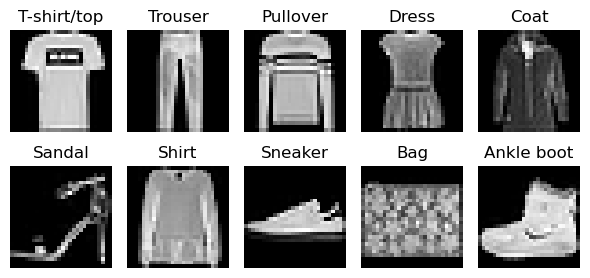

In [4]:
import matplotlib.pyplot as plt
import wandb


# Initialize WandB
wandb.init(entity="amar74384-iit-madras", project="DA6401_assign_1")
run_name = f"sample_images_run"
wandb.run.name = run_name
wandb.run.save()
# Class names (official from dataset)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Select one image for each class
selected_images = []
for i in range(10):
    index = np.where(y_train == i)[0][0]  # Get first occurrence of class
    selected_images.append((x_train[index], class_names[i]))

# Plot images
fig, ax = plt.subplots(2, 5, figsize=(6, 3))
for i, (image, label) in enumerate(selected_images):
    ax[i // 5, i % 5].imshow(image, cmap="gray")
    ax[i // 5, i % 5].set_title(label)
    ax[i // 5, i % 5].axis("off")

plt.tight_layout()

# Log figure to WandB
wandb.log({"Samples Image Form Each Class": wandb.Image(fig)})

plt.show()


# Finish WandB run
wandb.finish()
